In [7]:
import pandas as pd
df = pd.read_csv('diabetes.csv')
print(df.head())
print(df.columns)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [12]:
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [13]:
# Impute missing values
for column in df.columns:
    if df[column].dtype == 'object':
        # Fill missing values with the mode (most common value) for categorical data
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        # Fill missing values with the mean for numerical data
        df[column].fillna(df[column].mean(), inplace=True)

# Check if any missing values are left
print("Missing values after imputation:\n", df.isnull().sum())

Missing values after imputation:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


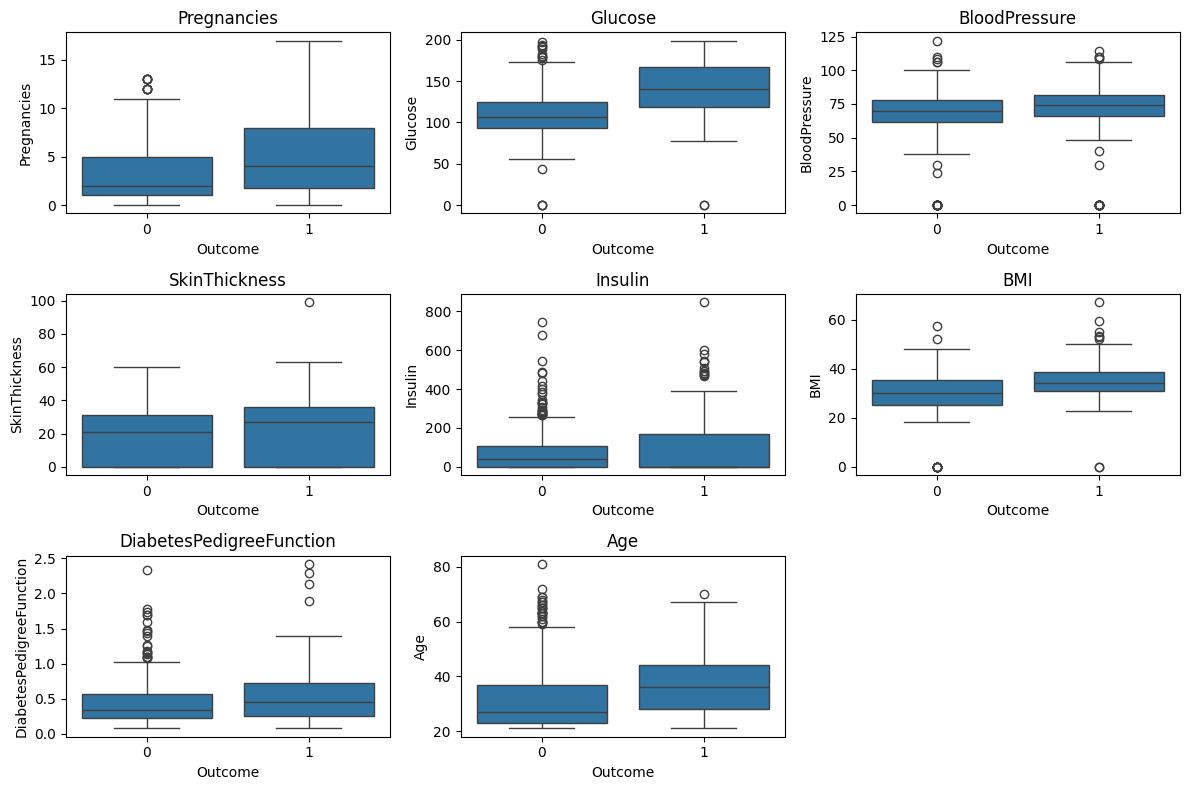

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
# Split data into diabetic and non-diabetic cases
diabetic = df[df['Outcome'] == 1]
non_diabetic = df[df['Outcome'] == 0]
# Plotting the distribution of each variable
plt.figure(figsize=(12, 8))
for i, column in enumerate(df.columns[:-1]):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x='Outcome', y=column, data=df)
    plt.title(column)
plt.tight_layout()
plt.show()


In [15]:
# Dependent variable
dependent_variable = 'Outcome'
# Independent variables
independent_variables = [col for col in df.columns if col != dependent_variable]
print("Dependent variable:", dependent_variable)
print("Independent variables:", independent_variables)

Dependent variable: Outcome
Independent variables: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
# Split the data
X = df[independent_variables]
y = df[dependent_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))


Logistic Regression Accuracy: 0.7532467532467533
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154

Random Forest Accuracy: 0.7402597402597403
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.82      0.80        99
           1       0.65      0.60      0.62        55

    accuracy                           0.74       154
   macro avg       0.72      0.71      0.71       154
weighted avg       0.74      0.74      0.74       154



In [17]:
!pip install shap

In [18]:
import shap

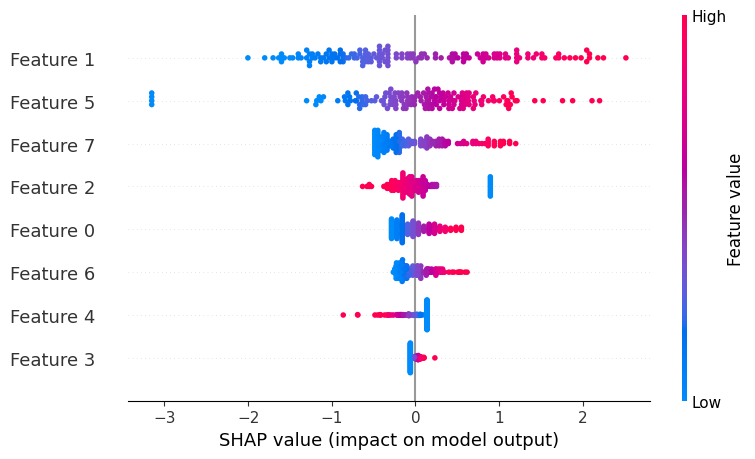

ExplainerError: Additivity check failed in TreeExplainer! Please ensure the data matrix you passed to the explainer is the same shape that the model was trained on. If your data shape is correct then please report this on GitHub. This check failed because for one of the samples the sum of the SHAP values was 0.530800, while the model output was 0.520000. If this difference is acceptable you can set check_additivity=False to disable this check.

In [28]:
#for Logistic Regression
explainer_lr = shap.Explainer(lr, X_test_scaled)
shap_values_lr = explainer_lr(X_test_scaled)
# for all features
shap.summary_plot(shap_values_lr, X_test)

#for Random Forest
explainer_rf = shap.Explainer(rf, X_test)
shap_values_rf = explainer_rf(X_test)
# Plot for all features
shap.summary_plot(shap_values_rf, X_test)

# SHAP dependence plot for age
shap.dependence_plot('Age', shap_values_lr, X_test, interaction_index=None)

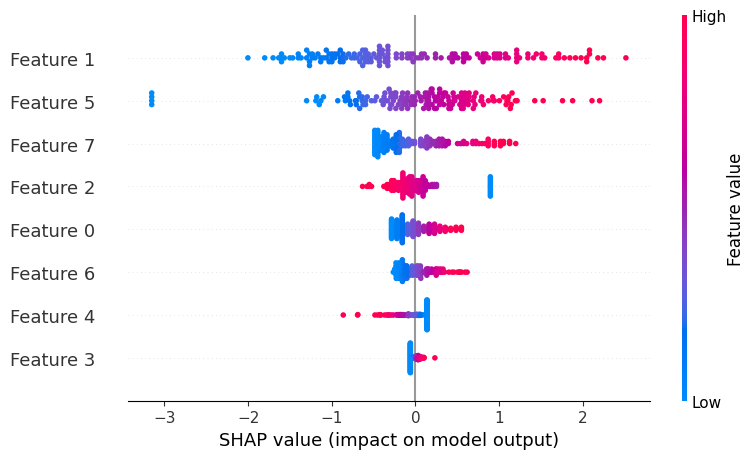

TypeError: TreeExplainer.__init__() got an unexpected keyword argument 'check_additivity'

In [27]:
import shap
# SHAP values for Logistic Regression
explainer_lr = shap.Explainer(lr, X_test_scaled)
shap_values_lr = explainer_lr(X_test_scaled)
# Plot SHAP values for all features for Logistic Regression
shap.summary_plot(shap_values_lr, X_test_scaled)

# SHAP values for Random Forest with TreeExplainer and additivity check disabled
explainer_rf = shap.TreeExplainer(rf, X_test, check_additivity=False)
shap_values_rf = explainer_rf(X_test)

# Plot SHAP values for all features for Random Forest
shap.summary_plot(shap_values_rf, X_test)
# SHAP dependence plot for age for Logistic Regression
shap.dependence_plot('Age', shap_values_lr, X_test_scaled)